In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [2]:
# I'm using the recent release of sklearn
#!pip install scikit-learn --upgrade --user

In [3]:
#to plot decision tree
#!pip install graphviz --user
#import graphviz

In [4]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

Analyze the Hosmer & Lemeshow low birth weight data using machine learning technique you learned in class

In [6]:
data=pd.read_excel('../data/birth_weight.xlsx')

In [7]:
data.head()

,identification code,birthweight<2500g,age of mother,weight at last menstrual period,race,smoked during pregnancy,premature labor history (count),has history of hypertension,"presence, uterine irritability",number of visits to physician during 1st trimester,birthweight (grams)
0,85,0,19,182,black,nonsmoker,0,0,1,0,2523
1,86,0,33,155,other,nonsmoker,0,0,0,3,2551
2,87,0,20,105,white,smoker,0,0,0,1,2557
3,88,0,21,108,white,smoker,0,0,1,2,2594
4,89,0,18,107,white,smoker,0,0,1,0,2600


In [8]:
data.columns=['id', 'baby_low_weight', 'mom_age', 'mom_weight', 'race', 'smoked', 'premature_labor', 'hyptertension', 'irritability', 'doc_visit', 'baby_weight']

# We are interested in what factors affect baby birth weight

In [9]:
data.head()

,id,baby_low_weight,mom_age,mom_weight,race,smoked,premature_labor,hyptertension,irritability,doc_visit,baby_weight
0,85,0,19,182,black,nonsmoker,0,0,1,0,2523
1,86,0,33,155,other,nonsmoker,0,0,0,3,2551
2,87,0,20,105,white,smoker,0,0,0,1,2557
3,88,0,21,108,white,smoker,0,0,1,2,2594
4,89,0,18,107,white,smoker,0,0,1,0,2600


In [10]:
data=pd.get_dummies(data)

In [11]:
data.columns

Index(['id', 'baby_low_weight', 'mom_age', 'mom_weight', 'premature_labor',
       'hyptertension', 'irritability', 'doc_visit', 'baby_weight',
       'race_black', 'race_other', 'race_white', 'smoked_nonsmoker',
       'smoked_smoker'],
      dtype='object')

In [27]:
X = data[['mom_age', 'mom_weight', 'premature_labor',
       'hyptertension', 'irritability', 'doc_visit', 
       'race_black', 'race_other', 'race_white', 'smoked_nonsmoker',
       'smoked_smoker']]
y = data['baby_low_weight']
#sns.distplot(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [14]:
dtree = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [15]:
yfit = dtree.predict(X_test)

In [16]:
resd = y_test - yfit

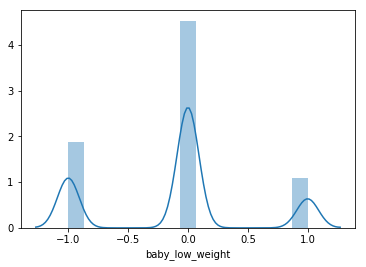

In [17]:
sns.distplot(resd)

In [18]:
accuracy_score(y_test, yfit)

0.6041666666666666

In [19]:
confusion_matrix(y_test, yfit)

array([[25, 12],
       [ 7,  4]], dtype=int64)

In [20]:
print(tree.export_graphviz(dtree, feature_names=X.columns, class_names=["normal", "low"]))

digraph Tree {
node [shape=box] ;
0 [label="premature_labor <= 0.5\ngini = 0.449\nsamples = 141\nvalue = [93, 48]\nclass = normal"] ;
1 [label="mom_age <= 15.5\ngini = 0.4\nsamples = 116\nvalue = [84, 32]\nclass = normal"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = low"] ;
1 -> 2 ;
3 [label="race_black <= 0.5\ngini = 0.382\nsamples = 113\nvalue = [84, 29]\nclass = normal"] ;
1 -> 3 ;
4 [label="mom_weight <= 106.5\ngini = 0.337\nsamples = 98\nvalue = [77, 21]\nclass = normal"] ;
3 -> 4 ;
5 [label="mom_age <= 18.5\ngini = 0.484\nsamples = 17\nvalue = [10, 7]\nclass = normal"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = normal"] ;
5 -> 6 ;
7 [label="mom_age <= 29.0\ngini = 0.497\nsamples = 13\nvalue = [6, 7]\nclass = low"] ;
5 -> 7 ;
8 [label="mom_age <= 22.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = low"] ;
7 -> 8 ;
9 [label="mom_weight <= 98.5\ngini = 0.49\nsamples = 7\nv

In [28]:
dtree2 = tree.DecisionTreeClassifier(max_leaf_nodes=5, max_features=2).fit(X_train, y_train)

In [29]:
yfit = dtree2.predict(X_test)

In [30]:
accuracy_score(yfit, y_test)

0.5833333333333334

In [31]:
confusion_matrix(y_test, yfit)

array([[25, 12],
       [ 8,  3]], dtype=int64)

In [32]:
print(tree.export_graphviz(dtree2, feature_names=X.columns, class_names=["normal", "low"]))

digraph Tree {
node [shape=box] ;
0 [label="race_black <= 0.5\ngini = 0.449\nsamples = 141\nvalue = [93, 48]\nclass = normal"] ;
1 [label="premature_labor <= 0.5\ngini = 0.429\nsamples = 122\nvalue = [84, 38]\nclass = normal"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="mom_age <= 15.5\ngini = 0.362\nsamples = 101\nvalue = [77, 24]\nclass = normal"] ;
1 -> 3 ;
5 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = low"] ;
3 -> 5 ;
6 [label="hyptertension <= 0.5\ngini = 0.337\nsamples = 98\nvalue = [77, 21]\nclass = normal"] ;
3 -> 6 ;
7 [label="gini = 0.312\nsamples = 93\nvalue = [75, 18]\nclass = normal"] ;
6 -> 7 ;
8 [label="gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = low"] ;
6 -> 8 ;
4 [label="gini = 0.444\nsamples = 21\nvalue = [7, 14]\nclass = low"] ;
1 -> 4 ;
2 [label="gini = 0.499\nsamples = 19\nvalue = [9, 10]\nclass = low"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}
